In [1]:
# 1. Install necessary libraries
!pip install spotipy prophet pandas matplotlib plotly

# 2. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import datetime


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 9.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 57.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.7 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)


/Users/Moussavi/Desktop/Radar/igroove/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Moussavi/Desktop/Radar/igroove/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
!pip install prophet pandas matplotlib


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [7]:
# Simulate 60 days of track popularity data
np.random.seed(42)  # for reproducibility
date_range = pd.date_range(start="2024-03-01", periods=60)
popularity = np.clip(np.random.normal(loc=60, scale=5, size=60), 0, 100)  # Spotify popularity is 0–100

df = pd.DataFrame({
    'ds': date_range,
    'y': popularity
})

df.head()


,ds,y
0,2024-03-01,62.483571
1,2024-03-02,59.308678
2,2024-03-03,63.238443
3,2024-03-04,67.615149
4,2024-03-05,58.829233


In [8]:
model = Prophet()
model.fit(df)

# Forecast 15 days into the future
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)


12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing


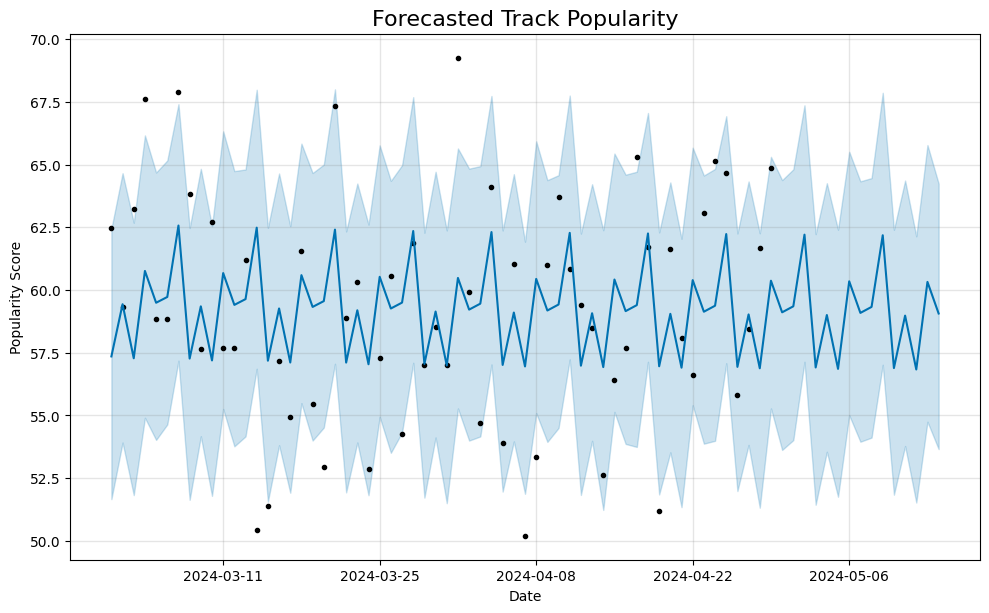

In [9]:
fig = model.plot(forecast)
plt.title("Forecasted Track Popularity", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Popularity Score")
plt.grid(True)
plt.show()


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
65,2024-05-05,56.856787,51.758133,62.404547
66,2024-05-06,60.347067,55.009667,65.511027
67,2024-05-07,59.087430,53.952686,64.332219
68,2024-05-08,59.326396,54.116111,64.462009
69,2024-05-09,62.182988,57.019805,67.862078
70,2024-05-10,56.889067,51.839554,62.402060
71,2024-05-11,58.979674,53.780338,64.363387
72,2024-05-12,56.833057,51.528264,62.140585
73,2024-05-13,60.323337,54.749278,65.777725
74,2024-05-14,59.063701,53.656926,64.242780


In [ ]:
!pip install python-dotenv


In [11]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os

In [20]:
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))


In [18]:
# Replace with your artist name
artist_name = "Shervin Hajipour"
result = sp.search(q='artist:' + artist_name, type='artist')
artist = result['artists']['items'][0]

artist_id = artist['id']
followers_now = artist['followers']['total']

print(f"Artist: {artist['name']}, Followers: {followers_now}")


Artist: Shervin Hajipour, Followers: 217464


In [14]:
# Simulate past 60 days (assume steady growth)
np.random.seed(42)
dates = pd.date_range(end=pd.Timestamp.today(), periods=60)
growth = np.random.normal(loc=1200, scale=100, size=60).cumsum()
base = followers_now - growth[-1]
followers = base + growth

df = pd.DataFrame({'ds': dates, 'y': followers.astype(int)})
df.head()


,ds,y
0,2025-03-11 12:44:46.352275,30039889
1,2025-03-12 12:44:46.352275,30041075
2,2025-03-13 12:44:46.352275,30042340
3,2025-03-14 12:44:46.352275,30043692
4,2025-03-15 12:44:46.352275,30044869


In [15]:
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(df)
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)


12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing


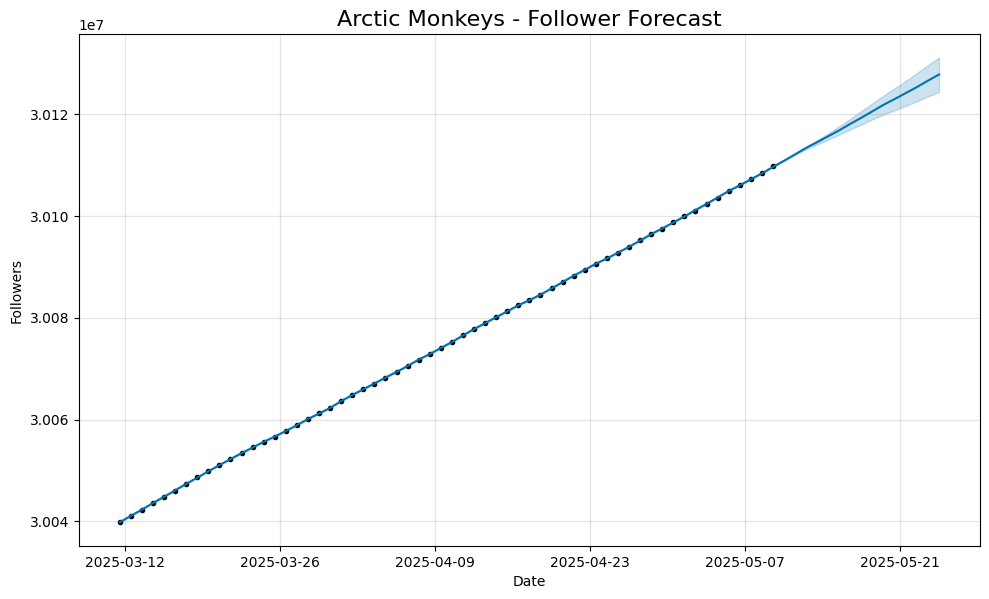

In [16]:
fig = model.plot(forecast)
plt.title(f"{artist_name} - Follower Forecast", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Followers")
plt.grid(True)
plt.show()


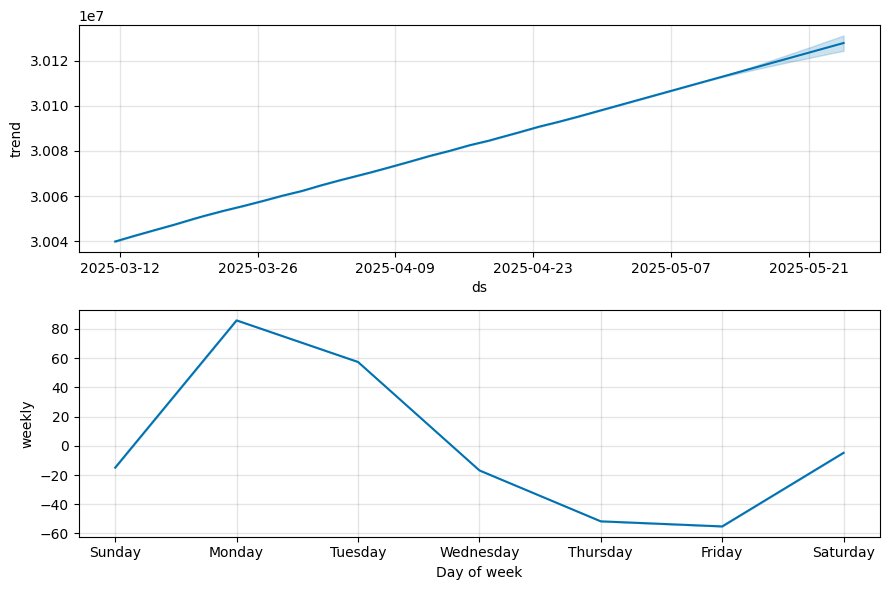

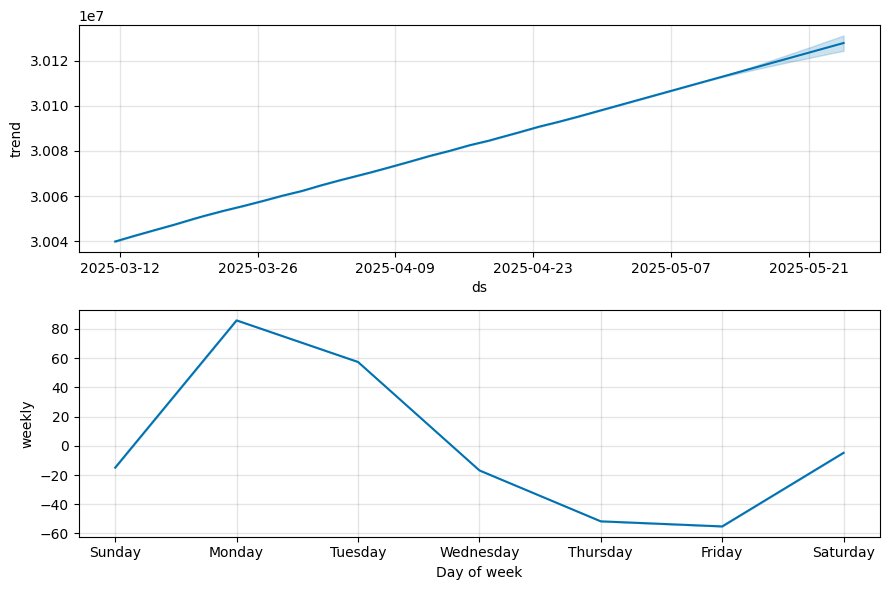

In [17]:
model.plot_components(forecast)


In [21]:
artist_name = "Billie Eilish"
results = sp.search(q=f"artist:{artist_name}", type='artist')
artist = results['artists']['items'][0]

print("Artist ID:", artist['id'])
print("Name:", artist['name'])
print("Followers:", artist['followers']['total'])
print("Genres:", artist['genres'])
print("Popularity (0-100):", artist['popularity'])


Artist ID: 6qqNVTkY8uBg9cP3Jd7DAH
Name: Billie Eilish
Followers: 111451539
Genres: []
Popularity (0-100): 95
